In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Lab 1

In [3]:
dataset_file = '../datasets/USArrests.csv'
seed = 1

data = pd.read_csv(dataset_file, index_col='State')
data.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [14]:
print(f'\tMeans:\n{data.mean()}')
print(f'\n\tVars:\n{data.std() ** 2}')

	Means:
Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

	Vars:
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [18]:
data = (data - data.mean()) / data.std()

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA().fit(data)

In [31]:
loadings = pd.DataFrame(pca.components_.T, index=data.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [27]:
scores = pca.transform(data)
scores.shape

(50, 4)

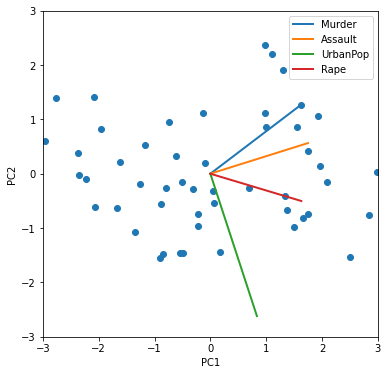

In [41]:
plt.figure(figsize=[6, 6])
plt.scatter(scores[:, 0], scores[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
for feature in loadings.index:
    plt.plot([0, loadings['PC1'][feature] * 3], [0, loadings['PC2'][feature] * 3], lw=2, label=feature)
plt.legend(loc='upper right')

In [49]:
var = scores.std(axis=0) ** 2
pve = var / var.sum()
pve

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Text(0.5, 1.0, 'Cumulative  Proportion  of Variance  Explained')

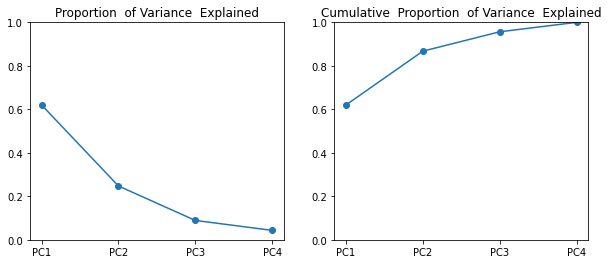

In [70]:
fig, axes = plt.subplots(ncols=2, figsize=[10, 4])
plt.sca(axes[0])
plt.plot(np.arange(1, 5), pve, 'o-')
plt.xticks(np.arange(1, 5), labels=loadings.columns)
plt.ylim(0, 1)
plt.title('Proportion  of Variance  Explained')

plt.sca(axes[1])
plt.plot(np.arange(1, 5), pve.cumsum(), 'o-')
plt.xticks(np.arange(1, 5), labels=loadings.columns)
plt.ylim(0, 1)
plt.title('Cumulative  Proportion  of Variance  Explained')